In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import module_heliquest_like

In [2]:
AAs = ['A', 'G',  'V', 'L', 'I', 'F', 'W', 'M', 'Y', 'C',
       'S', 'T', 'R', 'K', 'N', 'Q', 'D', 'E', 'H', 'P']

In [3]:
df = pd.read_csv('./AA.csv')

In [4]:
df.head()

,Gene_name,AH_seq,AH_localization,Group
0,KDSR,GLFRTIALFYLGSFDSIV,Golgi/ER/NE,1
1,TMEM214,CASHLAWFGDSLTSLSQRLQ,Golgi/Vesicles/PM,1
2,mboat7,LADTLRYWAS,Golgi/ER?,1
3,vma21,LASTLKTLL,Golgi/ER/NE,1
4,EMC7,VSEFMTRLFS,Golgi/ER/NE?,1


In [9]:
aa_seq = module_heliquest_like.AA_seq(df_aa.AH_seq.to_list()[1])
aa_seq.calculate_hydrophobic_moment()
aa_seq.extract_face_sequences()

In [5]:
for i, SEQ in enumerate(df.AH_seq.to_list()):
    aa_seq = module_heliquest_like.AA_seq(SEQ)

    aa_seq.calculate_hydrophobic_moment()
    aa_seq.extract_face_sequences()
    aa_seq.calculate_hydrophobicity()
    aa_seq.calculate_netcharge()
    aa_seq.calculate_dfactor()

    for AA in AAs:
        df.loc[i, 'phil_' + AA] = round(aa_seq.hydro_philic_face.count(AA) / len(aa_seq.hydro_philic_face), 2)
        df.loc[i, 'phob_' + AA] = round(aa_seq.hydro_phobic_face.count(AA) / len(aa_seq.hydro_philic_face), 2)
   
    df.loc[i, 'Length'] = len(SEQ)
    df.loc[i, 'Hydrophobicity'] = round(aa_seq.mean_hydrophobicity, 3)    
    df.loc[i, 'H_moment'] = aa_seq.mean_hydrophobic_moment
    df.loc[i, 'Netcharge'] = round(aa_seq.netcharge, 3)
    df.loc[i, 'Dfactor'] = round(aa_seq.dfactor, 3)

In [6]:
df.columns

Index(['Gene_name', 'AH_seq', 'AH_localization', 'Group', 'phil_A', 'phob_A',
       'phil_G', 'phob_G', 'phil_V', 'phob_V', 'phil_L', 'phob_L', 'phil_I',
       'phob_I', 'phil_F', 'phob_F', 'phil_W', 'phob_W', 'phil_M', 'phob_M',
       'phil_Y', 'phob_Y', 'phil_C', 'phob_C', 'phil_S', 'phob_S', 'phil_T',
       'phob_T', 'phil_R', 'phob_R', 'phil_K', 'phob_K', 'phil_N', 'phob_N',
       'phil_Q', 'phob_Q', 'phil_D', 'phob_D', 'phil_E', 'phob_E', 'phil_H',
       'phob_H', 'phil_P', 'phob_P', 'Length', 'Hydrophobicity', 'H_moment',
       'Netcharge', 'Dfactor'],
      dtype='object')

### Some columns combined

In [37]:
df['phil_LI'] = df.phil_L + df.phil_I
df['phil_FY'] = df.phil_F + df.phil_Y
df['phil_ST'] = df.phil_S + df.phil_T
df['phil_KR'] = df.phil_K + df.phil_R
df['phil_NQ'] = df.phil_N + df.phil_Q
df['phil_DE'] = df.phil_D + df.phil_E

df_for_heatmap_philic_test = df[['Group', 'phil_A', 'phil_G', 'phil_V',
       'phil_W', 'phil_M', 'phil_C', 'phil_LI', 'phil_FY', 'phil_ST', 'phil_KR', 'phil_DE',
       'phil_NQ', 'phil_H', 'phil_P']]

df_for_heatmap_philic_test_sub = df_for_heatmap_philic_test[df_for_heatmap_philic_test.Group != 4]

In [ ]:
df_for_heatmap_philic_test_sub.to_csv('./Output_philic_concentrated.csv', index=False)

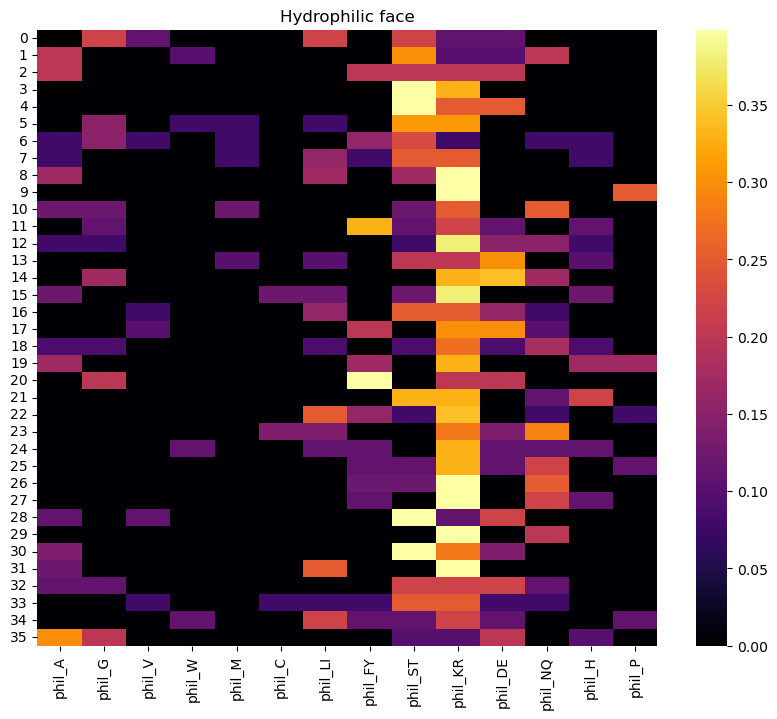

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_for_heatmap_philic_test_sub.drop(columns=['Group']), annot=False, cmap='inferno', fmt=".2f", robust=True)
plt.title('Hydrophilic face')
# plt.savefig('./hydrophilic.pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()

In [8]:
df_export = df_aa[['Gene_name', 'AH_seq', 'AH_localization', 'Length', 'Hydrophobicity', 'H_moment', 'Netcharge', 'Dfactor']]
df_export.to_csv('./Output.csv', index=False)

### Whoke dataset heatmapped

In [8]:
df_for_heatmap_phobic = df[['Group', 'phob_A', 'phob_G', 'phob_V', 'phob_L',
       'phob_I', 'phob_F', 'phob_W', 'phob_M', 'phob_Y', 'phob_C', 'phob_S',
       'phob_T', 'phob_R', 'phob_K', 'phob_N', 'phob_Q', 'phob_D', 'phob_E',
       'phob_H', 'phob_P']]

df_for_heatmap_philic = df[['Group', 'phil_A', 'phil_G', 'phil_V',
       'phil_L', 'phil_I', 'phil_F', 'phil_W', 'phil_M', 'phil_Y', 'phil_C',
       'phil_S', 'phil_T', 'phil_R', 'phil_K', 'phil_N', 'phil_Q', 'phil_D',
       'phil_E', 'phil_H', 'phil_P']]

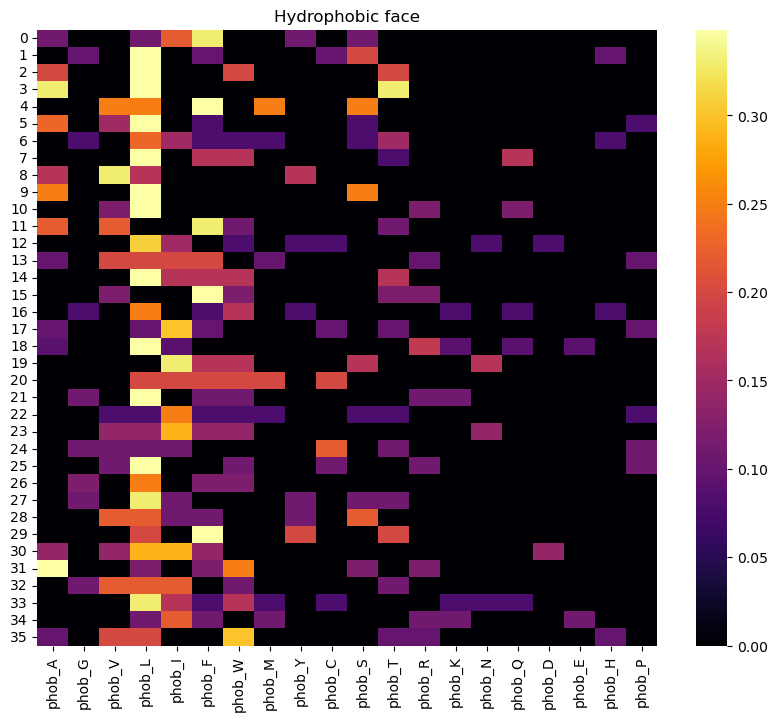

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_for_heatmap_phobic[df_for_heatmap_phobic.Group != 4].drop(columns = ['Group']), annot=False, cmap='inferno', fmt=".2f", robust=True)
plt.title('Hydrophobic face')
# plt.savefig('./hydrophobic.pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()

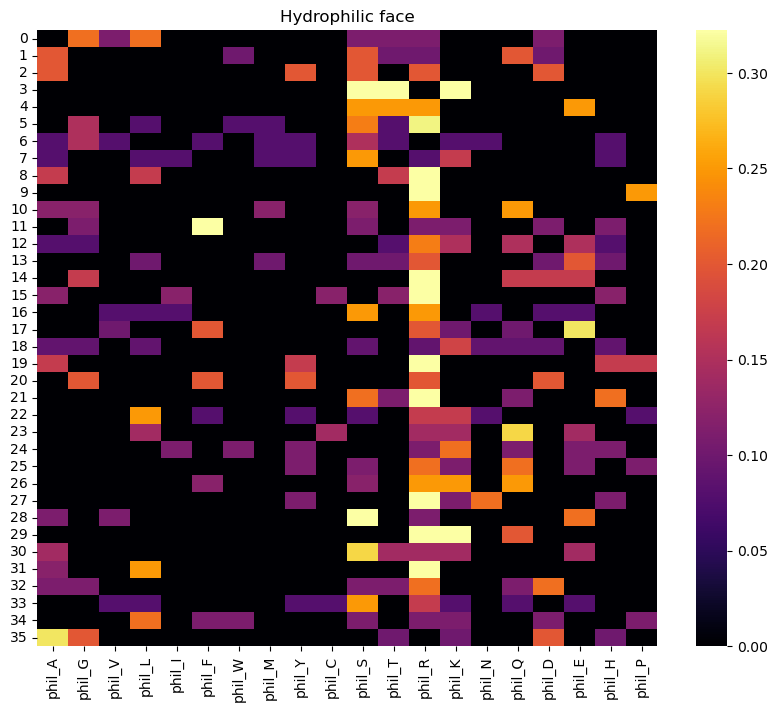

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_for_heatmap_philic, annot=False, cmap='inferno', fmt=".2f", robust=True)
plt.title('Hydrophilic face')
plt.savefig('./hydrophilic.pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()